# Fig 2 - introducing mixtures

## Overview:

<!-- N sprays most important thing for resistance

Effect of changes to initial distributions - variance and mean

(maths in appendix proves it)

And resistance increases with dose

Then can say simple things about resistance management, but yield and econ more complex (figs 2 onwards address)

FIG:
1. Mean of dist vs severity in diff cases (doses / sprays)
2. Mean of dist vs n sprays/dose
3. Variance vs change in following year or vs mean in year X -->

## Required data:

Uses `cluster/f2_mixtures.submit` which produces `outputs/fig2/300.csv`.

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib widget

In [193]:
import pandas as pd

import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px


from plots2.fns import (
    standard_layout,
    corner_annotations_colwise,
    corner_annotations_rowwise,
    get_text_annotation
)

# from poly2.utils import get_dist_mean, edge_values
from poly2.run import no_joblib_simulations_run
from poly2.config import Config, ConfigMixture

In [138]:
COLZ = sns.color_palette('muted').as_hex()

In [149]:
sns.set_palette("rocket", n_colors=21)

# Plot

## Data

In [239]:
df_in = (
    pd.read_csv('../outputs/combined/fig2/fig2_full_strength.csv')
    # pd.read_csv('../outputs/combined/fig2/fig2_weaker.csv')
    # pd.read_csv('../outputs/combined/fig2/fig2_decay_rates.csv')
    .assign(econ = lambda df: -20 + 117.14*df.yld - 2*32.4*(df.dose_A + df.dose_B))
)

df_in.head(3)

,Unnamed: 0,run,dose_A,dose_B,year,sev,yld,econ
0,0,0,0.0,0.0,1,19.967677,8.810391,1012.049227
1,1,0,0.0,0.0,2,19.967677,8.810391,1012.049227
2,2,0,0.0,0.0,3,19.967677,8.810391,1012.049227


In [240]:
df_use2 = (
    df_in.join(        
        df_in
        .drop(['run', 'year'], axis=1)
        .groupby(['dose_A', 'dose_B'])
        .cumsum()
        .rename(columns = lambda x: 'cum_'+str(x))
    )
    .assign(
        av_sev = lambda df: df.cum_sev/df.year,
        av_yld = lambda df: df.cum_yld/df.year,
        av_econ = lambda df: df.cum_econ/df.year,
    )
    # .loc[lambda df: df.year==15]
)

Text(0.5, 1.0, 'Different decay rates, dose B = 1')

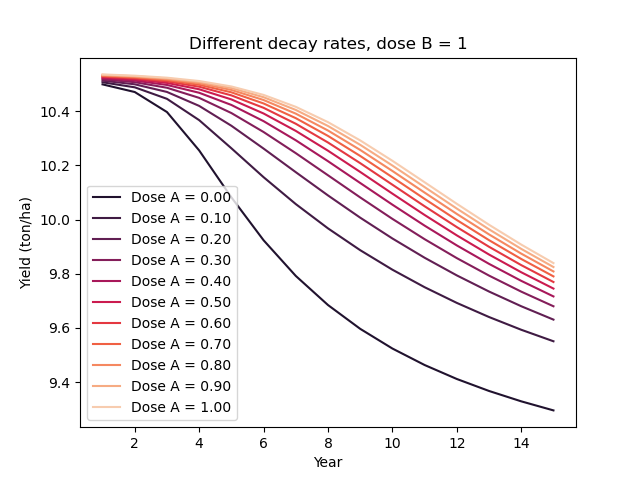

In [237]:
f, ax = plt.subplots()

sns.set_palette("rocket", n_colors=11)

dd = df_use2.set_index('year').loc[lambda df: df.dose_B==1]

for ii in dd.dose_A.unique()[::2]:
    ax.plot(dd.loc[dd.dose_A==ii].yld, label=f'Dose A = {ii:.2f}')
    
ax.legend()

ax.set_xlabel('Year')
ax.set_ylabel('Yield (ton/ha)')

# ax.set_title('Normal parameterisation, dose B = 1')
# ax.set_title('Weaker parameterisation, dose B = 1')
ax.set_title('Different decay rates, dose B = 1')

In [238]:
f.savefig('../figures/rough/decay.jpg')

Text(0.5, 1.0, 'Normal parameterisation')

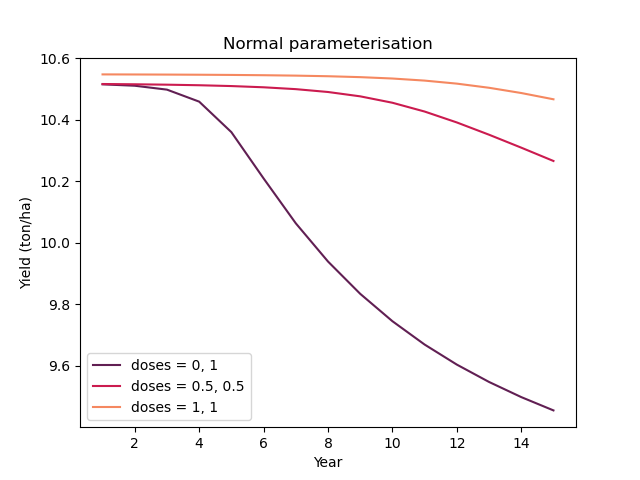

In [228]:
f, ax = plt.subplots()

sns.set_palette("rocket", n_colors=3)

dd = (
    df_use2
    .set_index('year')
    .loc[lambda df: df.dose_A.isin([0, 0.5, 1])]
    .loc[lambda df: df.dose_B.isin([0, 0.5, 1])]
)

ax.plot(
    dd.loc[lambda df: df.dose_A==0].loc[lambda df: df.dose_B==1].yld, 
    label='doses = 0, 1'
)

ax.plot(
    dd.loc[lambda df: df.dose_A==0.5].loc[lambda df: df.dose_B==0.5].yld, 
    label='doses = 0.5, 0.5'
)

ax.plot(
    dd.loc[lambda df: df.dose_A==1].loc[lambda df: df.dose_B==1].yld, 
    label='doses = 1, 1'
)
    
ax.legend()


ax.set_xlabel('Year')
ax.set_ylabel('Yield (ton/ha)')

ax.set_title('Normal parameterisation')

In [229]:
f.savefig('../figures/rough/normal_half_doses.jpg')

<AxesSubplot:xlabel='dose_A'>

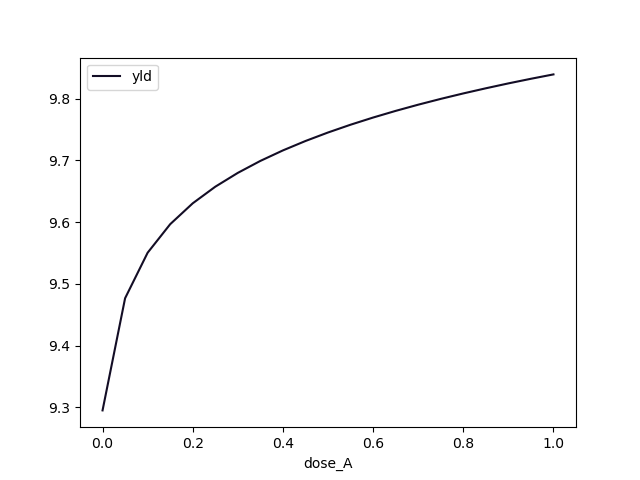

In [148]:
(
    dd
    .reset_index()
    .loc[:, ['yld', 'year', 'dose_A', 'dose_B']]
    .loc[lambda df: df.year==15]
    .plot(x='dose_A', y='yld')
)

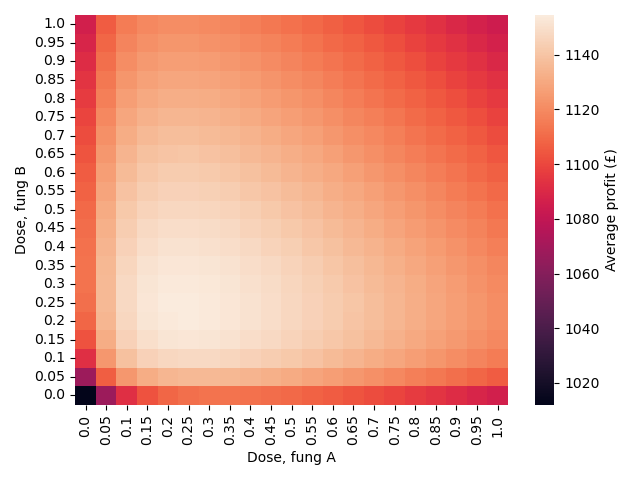

In [241]:
f, ax = plt.subplots()

dd = (
    df_use2
    .loc[lambda df: df.year==15]
    .round({'dose_A': 2, 'dose_B': 2})
    .pivot(index='dose_B', columns='dose_A', values='av_econ')
)

sns.heatmap(
    data=dd,
    ax=ax,
    cbar_kws={'label': 'Average profit (£)'}
)

ax.set_xlabel('Dose, fung A')
ax.set_ylabel('Dose, fung B')

ax.invert_yaxis()

f.tight_layout()

In [242]:
f.savefig('../figures/rough/econ_heatmap.jpg')

# Test infection rate

In [199]:
cm = ConfigMixture(
    sprays=[2],
    n_years=50,
)

CONFIG
------
A_b = 0.8431572316700577
A_mu = 9.44286788381916
B_b = 0.8431572316700577
B_mu = 9.44286788381916
I0s = [0.00985703, 0.00985703, 0.00985703, 0.00985 ...
betas = [0.00786542, 0.00786542, 0.00786542, 0.007 ...
decay_rate_A = None
decay_rate_B = None
doses_A = [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., ...
doses_B = [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., ...
fungicide_mixture = True
host_on = [False]
mutation_proportion = 1.234375e-05
mutation_scale_fung = 0.0019836158401698102
mutation_scale_host = 0.0019836158401698102
n_k = 50
n_years = 50
sprays = [2]
type = single



In [205]:
cm2 = ConfigMixture(
    sprays=[2],
    n_years=50,
    verbose=False,
)

cm2.betas = 0.01 * np.ones(50)

In [194]:
sb = no_joblib_simulations_run(cm)

running simulation


In [206]:
sb2 = no_joblib_simulations_run(cm2)

running simulation


Text(0, 0.5, 'Yield tons/ha')

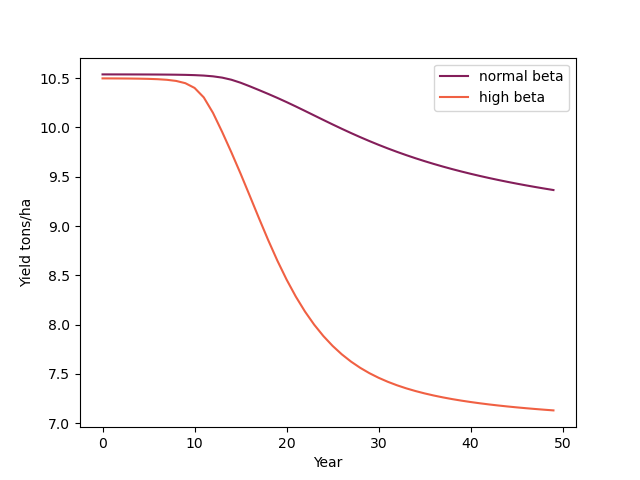

In [207]:
f, ax = plt.subplots()

sns.set_palette("rocket", n_colors=2)

ax.plot(sb['spray_2_host_N']['yield_vec'], label='normal beta')
ax.plot(sb2['spray_2_host_N']['yield_vec'], label='high beta')

ax.legend()

ax.set_xlabel('Year')
ax.set_ylabel('Yield tons/ha')

In [208]:
f.savefig('../figures/rough/change_beta.jpg')

# Long timescale diff decay rates

In [273]:
cm = ConfigMixture(
    sprays=[2],
    n_years=50,
    decay_rate_A=6.91e-3,
    decay_rate_B=1.11e-2,
    dose_A=0.5,
    dose_B=0.5,
    verbose=False,
)

cm.betas = 0.01*np.ones(50)
# cm.mutation_proportion = 1e-3

In [274]:
cm2 = ConfigMixture(
    sprays=[2],
    n_years=50,
    decay_rate_A=6.91e-3,
    decay_rate_B=1.11e-2,
    dose_A=1,
    dose_B=1,
    verbose=False,
)

cm2.betas = 0.01*np.ones(50)
# cm2.mutation_proportion = 1e-3

In [275]:
s1 = no_joblib_simulations_run(cm)

running simulation


In [276]:
s2 = no_joblib_simulations_run(cm2)

running simulation


In [279]:
s1['spray_2_host_N'].keys()

dict_keys(['fung_dists_A', 'fung_dists_B', 'fung_mean_A', 'fung_mean_B', 'n_k', 'k_vec', 'I0s', 'betas', 't', 'y', 'total_I', 'dis_sev', 'yield_vec', 'econ'])

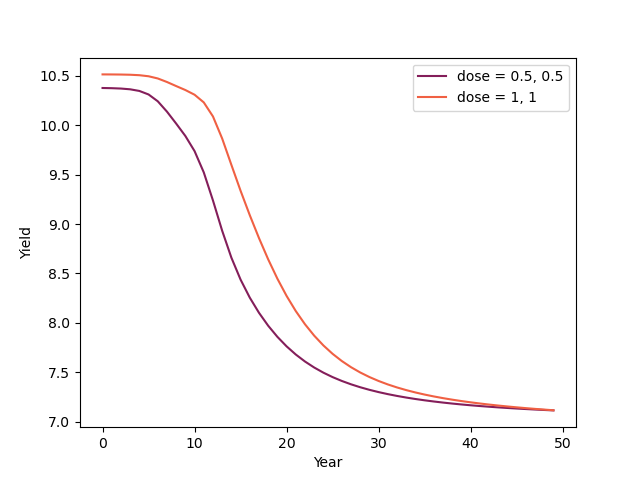

In [288]:
f, ax = plt.subplots()

sns.set_palette("rocket", n_colors=2)


ax.plot(s1['spray_2_host_N']['yield_vec'], label='dose = 0.5, 0.5')
ax.plot(s2['spray_2_host_N']['yield_vec'], label='dose = 1, 1')
# ax.plot(s1['spray_2_host_N']['fung_mean_B'], label='dose = 0.5, 0.5')
# ax.plot(s2['spray_2_host_N']['fung_mean_B'], label='dose = 1, 1')

ax.set_xlabel('Year')
ax.set_ylabel('Yield')
# ax.set_ylabel('Fungicide A trait mean')

ax.legend()

In [289]:
f.savefig('../figures/rough/yield.jpg')

# Trying to make low doses better than high over longer timescales

In [273]:
cm = ConfigMixture(
    sprays=[2],
    n_years=50,
    decay_rate_A=6.91e-3,
    decay_rate_B=1.11e-2,
    dose_A=0.5,
    dose_B=0.5,
    verbose=False,
)

cm.betas = 0.01*np.ones(50)
# cm.mutation_proportion = 1e-3

In [274]:
cm2 = ConfigMixture(
    sprays=[2],
    n_years=50,
    decay_rate_A=6.91e-3,
    decay_rate_B=1.11e-2,
    dose_A=1,
    dose_B=1,
    verbose=False,
)

cm2.betas = 0.01*np.ones(50)
# cm2.mutation_proportion = 1e-3

In [275]:
s1 = no_joblib_simulations_run(cm)

running simulation


In [276]:
s2 = no_joblib_simulations_run(cm2)

running simulation


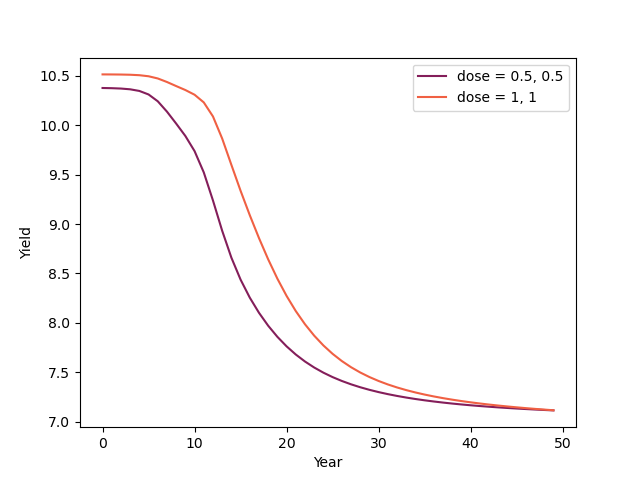

In [288]:
f, ax = plt.subplots()

sns.set_palette("rocket", n_colors=2)


ax.plot(s1['spray_2_host_N']['yield_vec'], label='dose = 0.5, 0.5')
ax.plot(s2['spray_2_host_N']['yield_vec'], label='dose = 1, 1')
# ax.plot(s1['spray_2_host_N']['fung_mean_B'], label='dose = 0.5, 0.5')
# ax.plot(s2['spray_2_host_N']['fung_mean_B'], label='dose = 1, 1')

ax.set_xlabel('Year')
ax.set_ylabel('Yield')
# ax.set_ylabel('Fungicide A trait mean')

ax.legend()